In [ ]:
import json
import numpy as np
import math
from collections import defaultdict

FILE_PATH = "data.json"
N_FRAMES = 15
LEN = 42
labels = ["swipe left","swipe right","still","start/pause","volume"]

with open(FILE_PATH, "r") as f:
  data = json.load(f)

def filter_landmarks(dataset, landmark_indices=[0,4,8,12,16,20]):
    indices_to_keep = []
    for idx in landmark_indices:
        indices_to_keep.extend([2 * idx, 2 * idx + 1])

    filtered_dataset = []
    for movement in dataset:
        filtered_frames = []
        for frame in movement["frames"]:
            filtered_frame = [frame[i] for i in indices_to_keep]
            filtered_frames.append(filtered_frame)
        filtered_dataset.append({
            "label": movement["label"],
            "frames": filtered_frames
        })

    return filtered_dataset

def normalize_sequence(sequence):
  # find center
  arr = np.array(sequence)
  arr = arr.reshape(-1,2)
  center = arr.mean(axis=0)
  # find scale
  scale = arr.std(axis=0)
  # normalize
  normalized = (arr - center) / scale
  return normalized.reshape(N_FRAMES,LEN)

X = []
Y = []
label_counts = defaultdict(int)

filtered_data = filter_landmarks(data)

for sequence in data:
    label = sequence["label"] - 1
    n_sequence = normalize_sequence(sequence["frames"])
    X.append(n_sequence)
    Y.append(label)
    label_counts[label] += 1

X = np.array(X)
Y = np.array(Y)
print(Y)
print(X.shape)
print(Y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

Epoch 1/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6500 - loss: 1.1284 - val_accuracy: 0.9000 - val_loss: 0.2137
Epoch 2/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9758 - loss: 0.1297 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 3/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9666 - loss: 0.1320 - val_accuracy: 1.0000 - val_loss: 0.1756
Epoch 4/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9400 - loss: 0.1909 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 5/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9813 - loss: 0.0626 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 6/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9899 - loss: 0.0509 - val_accuracy: 0.9900 - val_loss: 0.0183
Epoch 7/7
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9977 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0098


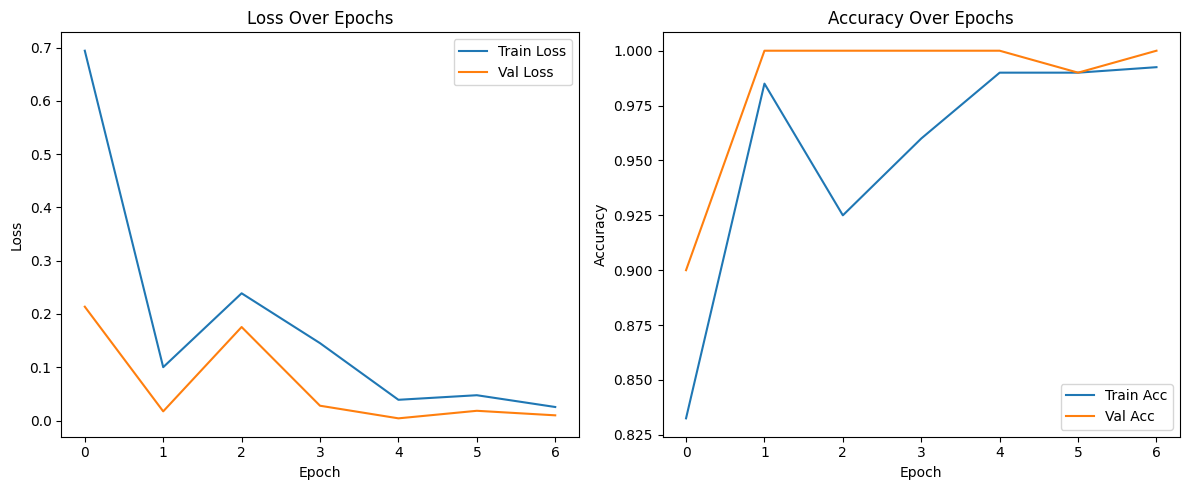

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step


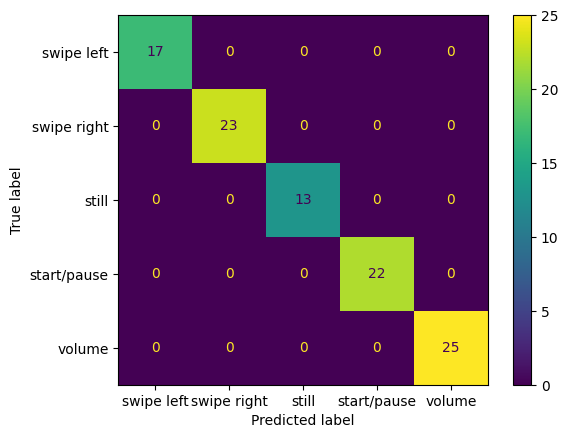

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import numpy as np

# architecture
model = keras.Sequential([
 keras.Input(shape=(15, LEN)),
 keras.layers.LSTM(64),
 keras.layers.Dropout(0.3),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(6, activation="softmax")
])

# compile
model.compile(optimizer=keras.optimizers.Adam(),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

# fit
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=7, batch_size=5, shuffle=True)

# save model
model.save('my_model.keras')

# plot loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()